In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [372]:
df = pd.read_csv('Train.csv')

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [373]:
df.shape

(8068, 11)

In [374]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [375]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [376]:
# filling categorical columns

missing_cat_cols = ['Ever_Married' , 'Graduated' , 'Profession' , 'Var_1']

for col in missing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [377]:
df[missing_cat_cols].isna().sum()

Ever_Married    0
Graduated       0
Profession      0
Var_1           0
dtype: int64

In [378]:
# filling numerical columns

missing_num_cols = ['Work_Experience' , 'Family_Size']

for col in missing_num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [379]:
df[missing_num_cols].isna().sum()

Work_Experience    0
Family_Size        0
dtype: int64

In [380]:
# Remove Irrelevant Features
df = df.drop('ID' , axis = 1)

In [381]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


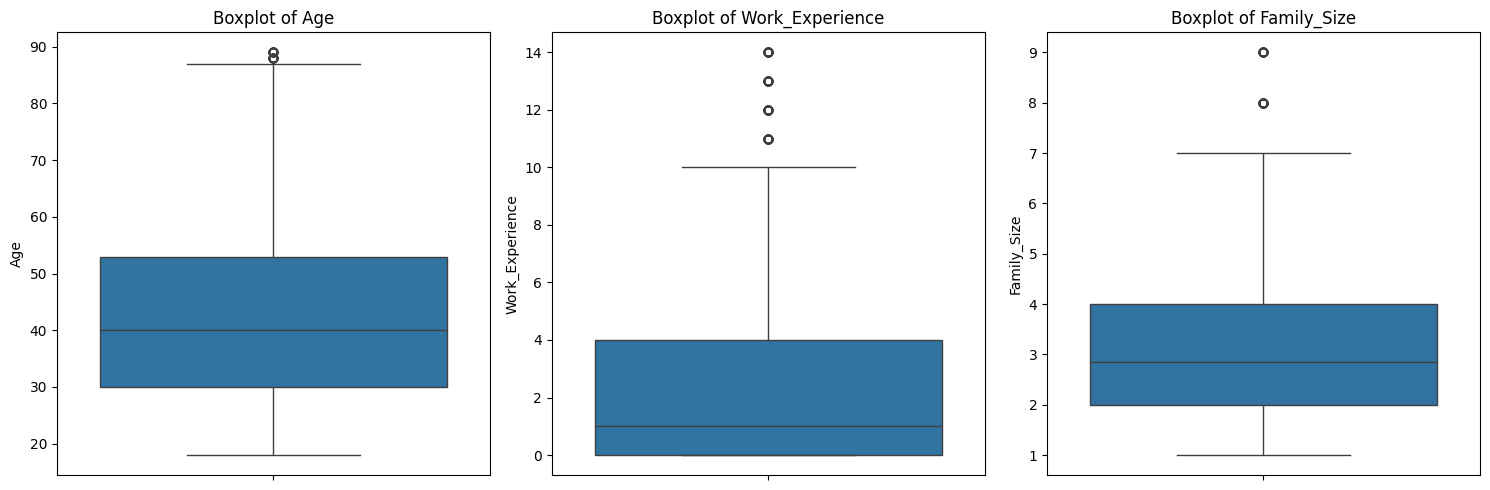

In [382]:
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [383]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removing outliers
df_cleaned = remove_outliers(df, numerical_cols)

In [384]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [385]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Assuming df is your preprocessed DataFrame
# Binary encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Ever_Married'] = df['Ever_Married'].map({'Yes': 1, 'No': 0})
df['Graduated'] = df['Graduated'].map({'Yes': 1, 'No': 0})

# Ordinal encoding for Spending_Score
spending_order = ['Low', 'Average', 'High']
df['Spending_Score'] = OrdinalEncoder(categories=[spending_order]).fit_transform(df[['Spending_Score']])

# One-hot encoding for Profession and Var_1
df = pd.get_dummies(df, columns=['Profession', 'Var_1'], drop_first=True)

In [386]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,38,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,67,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,67,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,40,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [387]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [388]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.056338,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,0.281690,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,0.690141,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,0.690141,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,0.309859,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


# Possibilistic C-Means (PCM)

In [389]:
def euclidean_distance(X, C):
    """Compute squared Euclidean distance between points and cluster centers."""
    return np.linalg.norm(X[:, np.newaxis] - C, axis=2) ** 2

def initialize_centroids(X, k):
    """Randomly initialize k centroids from the dataset."""
    indices = np.random.choice(len(X), size=k, replace=False)
    return X[indices]

def update_membership(X, C, gamma, m):
    """Update possibilistic membership matrix U."""
    dist = euclidean_distance(X, C)
    U = 1 / (1 + (dist / gamma[np.newaxis, :]) ** (1 / (m - 1)))
    return U

In [390]:
def update_centroids(X, U, m):
    """Update cluster centroids based on membership matrix."""
    um = U ** m
    C = (um.T @ X) / np.sum(um.T, axis=1)[:, np.newaxis]
    return C

def update_gamma(U, dist, m, eta):
    """Update gamma values for each cluster."""
    um = U ** m
    numerator = np.sum(um * dist, axis=0)
    denominator = np.sum(um, axis=0)
    gamma = eta * (numerator / denominator)
    return gamma

In [391]:
def pcm(X, k, m=2.0, eta=0.5, max_iter=100, tol=1e-4):
    """Possibilistic C-Means clustering algorithm."""
    C = initialize_centroids(X, k)
    gamma = np.ones(k)
    prev_C = C.copy()

    for _ in range(max_iter):
        dist = euclidean_distance(X, C)
        U = update_membership(X, C, gamma, m)
        C = update_centroids(X, U, m)
        gamma = update_gamma(U, dist, m, eta)

        # Check for convergence
        if np.linalg.norm(C - prev_C) < tol:
            break
        prev_C = C.copy()

    return C, U

In [392]:
df = df.drop('Segmentation' , axis = 1)
X = df.values.astype(float)

# Step 2: Run PCM
centroids, membership = pcm(X, k=3, m=2.0, eta=0.5, max_iter=100)

# Step 3: Get hard cluster assignments (optional)
labels = np.argmax(membership, axis=1)
df['Cluster'] = labels

# View results
print("Cluster centroids:\n", centroids)
print("\nSample cluster assignments:\n", df['Cluster'].value_counts())

Cluster centroids:
 [[0.59188908 0.71922726 0.41127252 0.74390189 0.82839919 0.58706901
  2.48834523 0.07438812 0.06418302 0.11056824 0.05049777 0.10683826
  0.00997906 0.07518851 0.02376213 0.02694618 0.06660338 0.07829277
  0.0051936  0.79258624 0.01612501]
 [0.5918921  0.71921859 0.41126432 0.74388575 0.82842088 0.58708263
  2.488465   0.07438968 0.06418393 0.11056973 0.05050113 0.1068495
  0.00997961 0.07518412 0.02376282 0.02694813 0.06660683 0.07829753
  0.0051937  0.79257499 0.01612565]
 [0.59188977 0.71922457 0.4112703  0.74389757 0.82840573 0.58707164
  2.48837538 0.07438854 0.06418329 0.11056866 0.05049858 0.10684129
  0.00997921 0.07518737 0.02376233 0.0269467  0.06660432 0.07829406
  0.00519363 0.7925832  0.01612518]]

Sample cluster assignments:
 Cluster
1    6307
0    1594
2     167
Name: count, dtype: int64


In [393]:
from sklearn.decomposition import PCA

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

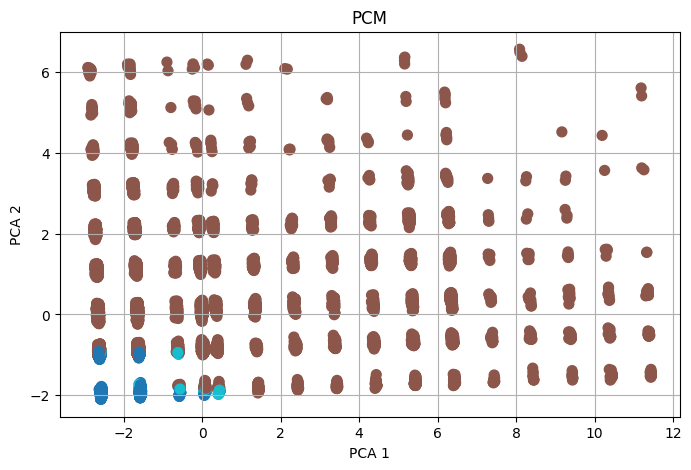

In [394]:
plot_clusters(reduced , labels , title = 'PCM')